In [18]:
!pip install pandas
!pip install numpy
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 93.6 MB/s eta 0:00:00


In [19]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Si les fichiers csv ne sont pas présents dans descriptive_data, veuillez à récupérer une clé 
#rapidAPI executer le code suivant 
#!python /home/onyxia/work/Premier-League-Simulation/src/scripts/get_descriptive_data.py

In [ ]:
try:
    root = '/home/onyxia/work/Premier-League-Simulation/src/data/descriptive_data/'

    salah = pd.read_csv(root + "statsheet_Mohamed_Salah.csv")
    saka = pd.read_csv(root + "statsheet_Bukayo_Saka.csv")
    isak = pd.read_csv(root + "statsheet_Alexander_Isak.csv")
    mbeumo = pd.read_csv(root + "statsheet_Bryan_Mbeumo.csv")
    diaz = pd.read_csv(root + "statsheet_Luis_Díaz.csv")
    haaland = pd.read_csv(root + "statsheet_Erling_Haaland.csv")
    son = pd.read_csv(root + "statsheet_Heung-min_Son.csv")
    cunha = pd.read_csv(root + "statsheet_Matheus_Cunha.csv")
    johnson = pd.read_csv(root + "statsheet_Brennan_Johnson.csv")
    gordon = pd.read_csv(root + "statsheet_Anthony_Gordon.csv")
except Exception as e:
    print(e)


##  2. Data visualisation

### Quick Overview

In [15]:
players = [salah, saka, isak, mbeumo, diaz, haaland, son, cunha, johnson, gordon]

stats_list = ['Goals', 'Assists', 'xG', 'xA', 'Big Chances Created', 'Big Chances Missed', 'Shots on Target']

def calculate_stats(stat_name):
    values = [player[stat_name].sum() for player in players]
    mean_stat = np.mean(values)
    std_dev_stat = np.std(values, ddof=1)
    standard_error_stat = std_dev_stat / np.sqrt(len(players))
    return mean_stat, std_dev_stat, standard_error_stat

for stat in stats_list:
    mean_stat, std_dev_stat, standard_error_stat = calculate_stats(stat)
    print(f"{stat}:")
    print(f"  Mean: {mean_stat}")
    print(f"  Standard Deviation: {std_dev_stat}")
    print(f"  Standard Error: {standard_error_stat}")
    print()  #for readability

Goals:
  Mean: 2.9
  Standard Deviation: 2.0248456731316584
  Standard Error: 0.6403124237432848

Assists:
  Mean: 1.8
  Standard Deviation: 1.6865480854231356
  Standard Error: 0.5333333333333333

xG:
  Mean: 2.2395300000000002
  Standard Deviation: 1.622107328309553
  Standard Error: 0.5129553766708714

xA:
  Mean: 1.0642737490000003
  Standard Deviation: 0.5081077070406977
  Standard Error: 0.1606777650934178

Big Chances Created:
  Mean: 2.8
  Standard Deviation: 2.3475755815545347
  Standard Error: 0.7423685817106696

Big Chances Missed:
  Mean: 2.1
  Standard Deviation: 1.4491376746189437
  Standard Error: 0.45825756949558394

Shots on Target:
  Mean: 7.2
  Standard Deviation: 2.780887148615228
  Standard Error: 0.8793937305515279



### Direct contributions and efficiency

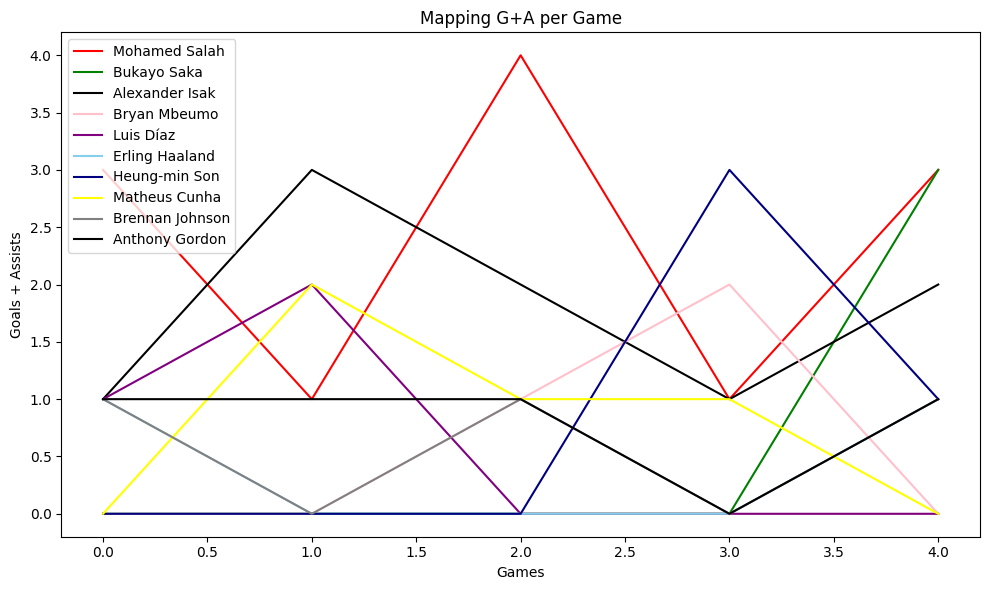

In [20]:
#total contributions
plt.figure(figsize=(10, 6))

plt.plot(salah['Goals'] + salah['Assists'], label='Mohamed Salah',color='red')
plt.plot(saka['Goals']+saka['Assists'], label='Bukayo Saka',color='green')
plt.plot(isak['Goals']+isak['Assists'], label='Alexander Isak',color='black')
plt.plot(mbeumo['Goals']+mbeumo['Assists'], label='Bryan Mbeumo', color='pink')
plt.plot(diaz['Goals']+diaz['Assists'], label='Luis Díaz',color='purple')
plt.plot(haaland['Goals']+haaland['Assists'], label='Erling Haaland',color='skyblue')
plt.plot(son['Goals']+son['Assists'], label='Heung-min Son', color='navy')
plt.plot(cunha['Goals']+cunha['Assists'], label='Matheus Cunha', color='yellow')
plt.plot(johnson['Goals']+johnson['Assists'], label='Brennan Johnson', color="grey")
plt.plot(gordon['Goals']+gordon['Assists'], label='Anthony Gordon', color='black')

plt.ylabel('Goals + Assists')
plt.xlabel('Games')
plt.title('Mapping G+A per Game')

plt.legend()
plt.tight_layout()
plt.show()


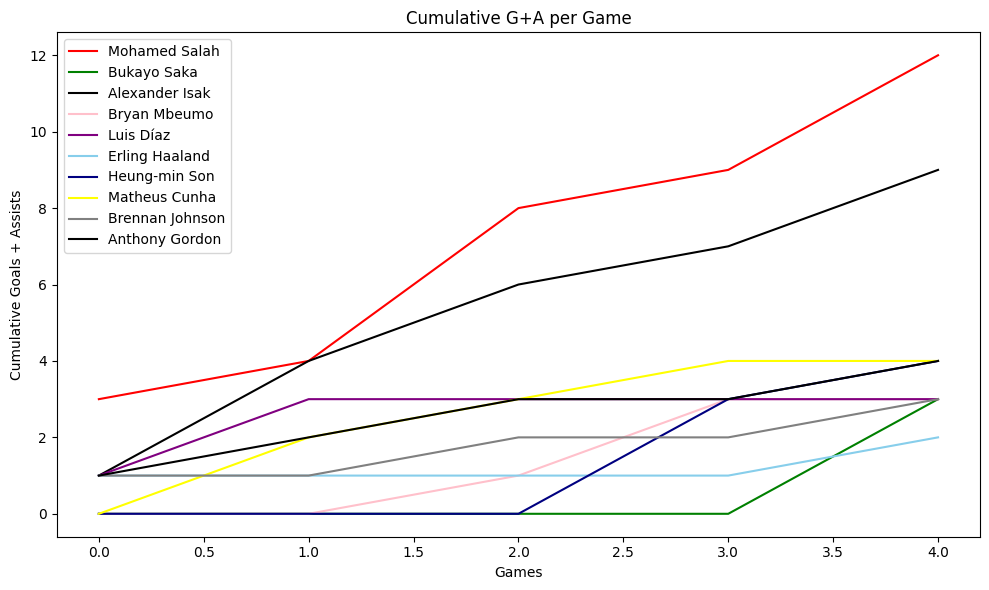

In [21]:
# cumsums for increased visibility
plt.figure(figsize=(10, 6))

plt.plot((salah['Goals'] + salah['Assists']).cumsum(), label='Mohamed Salah', color='red')
plt.plot((saka['Goals'] + saka['Assists']).cumsum(), label='Bukayo Saka', color='green')
plt.plot((isak['Goals'] + isak['Assists']).cumsum(), label='Alexander Isak', color='black')
plt.plot((mbeumo['Goals'] + mbeumo['Assists']).cumsum(), label='Bryan Mbeumo', color='pink')
plt.plot((diaz['Goals'] + diaz['Assists']).cumsum(), label='Luis Díaz', color='purple')
plt.plot((haaland['Goals'] + haaland['Assists']).cumsum(), label='Erling Haaland', color='skyblue')
plt.plot((son['Goals'] + son['Assists']).cumsum(), label='Heung-min Son', color='navy')
plt.plot((cunha['Goals'] + cunha['Assists']).cumsum(), label='Matheus Cunha', color='yellow')
plt.plot((johnson['Goals'] + johnson['Assists']).cumsum(), label='Brennan Johnson', color="grey")
plt.plot((gordon['Goals'] + gordon['Assists']).cumsum(), label='Anthony Gordon', color='black')

plt.ylabel('Cumulative Goals + Assists')
plt.xlabel('Games')
plt.title('Cumulative G+A per Game')

plt.legend()
plt.tight_layout()
plt.show()


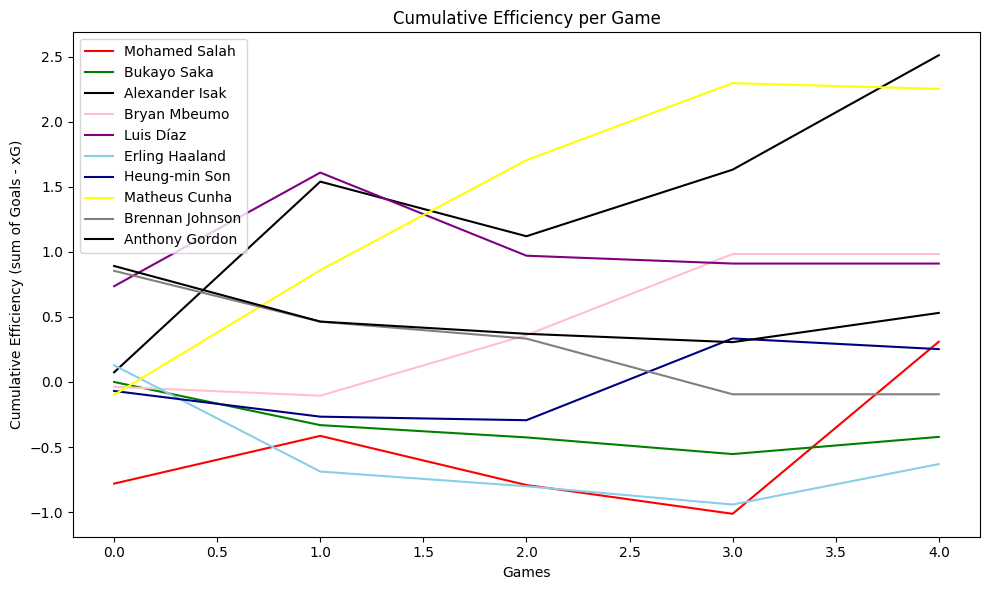

In [22]:
#cumefficiency (cumsum of Goals - xG for each player)
salah_efficiency = (salah['Goals'] - salah['xG']).cumsum()
saka_efficiency = (saka['Goals'] - saka['xG']).cumsum()
isak_efficiency = (isak['Goals'] - isak['xG']).cumsum()
mbeumo_efficiency = (mbeumo['Goals'] - mbeumo['xG']).cumsum()
diaz_efficiency = (diaz['Goals'] - diaz['xG']).cumsum()
haaland_efficiency = (haaland['Goals'] - haaland['xG']).cumsum()
son_efficiency = (son['Goals'] - son['xG']).cumsum()
cunha_efficiency = (cunha['Goals'] - cunha['xG']).cumsum()
johnson_efficiency = (johnson['Goals'] - johnson['xG']).cumsum()
gordon_efficiency = (gordon['Goals'] - gordon['xG']).cumsum()

plt.figure(figsize=(10, 6))

plt.plot(salah_efficiency, label='Mohamed Salah', color='red')
plt.plot(saka_efficiency, label='Bukayo Saka', color='green')
plt.plot(isak_efficiency, label='Alexander Isak', color='black')
plt.plot(mbeumo_efficiency, label='Bryan Mbeumo', color='pink')
plt.plot(diaz_efficiency, label='Luis Díaz', color='purple')
plt.plot(haaland_efficiency, label='Erling Haaland', color='skyblue')
plt.plot(son_efficiency, label='Heung-min Son', color='navy')
plt.plot(cunha_efficiency, label='Matheus Cunha', color='yellow')
plt.plot(johnson_efficiency, label='Brennan Johnson', color="grey")
plt.plot(gordon_efficiency, label='Anthony Gordon', color='black')

plt.ylabel('Cumulative Efficiency (sum of Goals - xG)')
plt.xlabel('Games')
plt.title('Cumulative Efficiency per Game')

plt.legend()
plt.tight_layout() 
plt.show()



### Player profiles

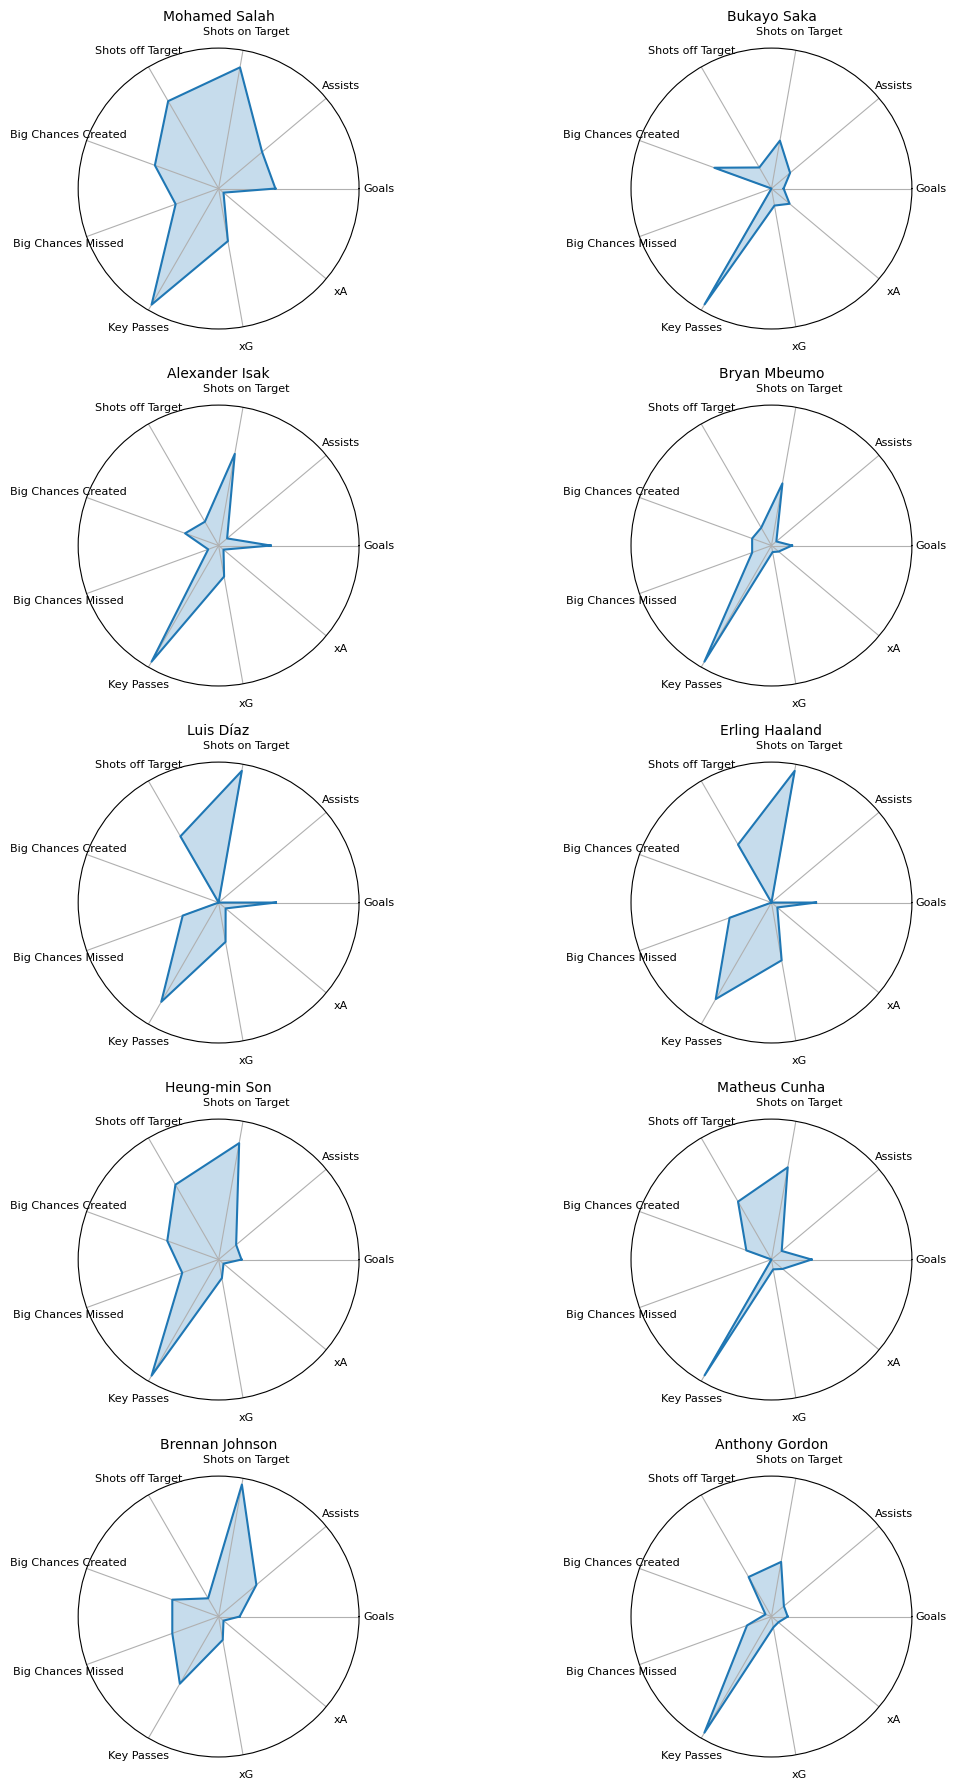

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Liste des catégories de statistiques
stats_categories = [
    "Goals", "Assists", "Shots on Target", 
    "Shots off Target", "Big Chances Created", "Big Chances Missed", 
    "Key Passes", "xG", "xA"
]

# Fonction pour créer un graphique radar pour un joueur
def create_spider_graph(ax, player_data, player_name):
    num_stats = len(stats_categories)
    angles = np.linspace(0, 2 * np.pi, num_stats, endpoint=False).tolist()
    angles += angles[:1]  # Boucler sur le premier angle
    
    stats = player_data[stats_categories].mean().tolist()
    stats += stats[:1]
    
    ax.fill(angles, stats, alpha=0.25, label=player_name)
    ax.plot(angles, stats)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(stats_categories, fontsize=8)
    ax.set_title(player_name, fontsize=10, pad=20)

# Données des joueurs (remplacez les DataFrames par vos données)
players = {
    "Mohamed Salah": salah,
    "Bukayo Saka": saka,
    "Alexander Isak": isak,
    "Bryan Mbeumo": mbeumo,
    "Luis Díaz": diaz,
    "Erling Haaland": haaland,
    "Heung-min Son": son,
    "Matheus Cunha": cunha,
    "Brennan Johnson": johnson,
    "Anthony Gordon": gordon
}

# Créer une disposition de 5 lignes x 2 colonnes pour les graphiques
fig, axes = plt.subplots(5, 2, subplot_kw=dict(polar=True), figsize=(12, 18))

# Tracer les graphiques pour chaque joueur
for i, (player_name, player_data) in enumerate(players.items()):
    row, col = divmod(i, 2)  # 5 lignes, 2 colonnes
    ax = axes[row, col]
    create_spider_graph(ax, player_data, player_name)

# Supprimer les sous-graphiques inutilisés s'il y en a
if len(players) < 10:
    for i in range(len(players), 10):
        row, col = divmod(i, 2)
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


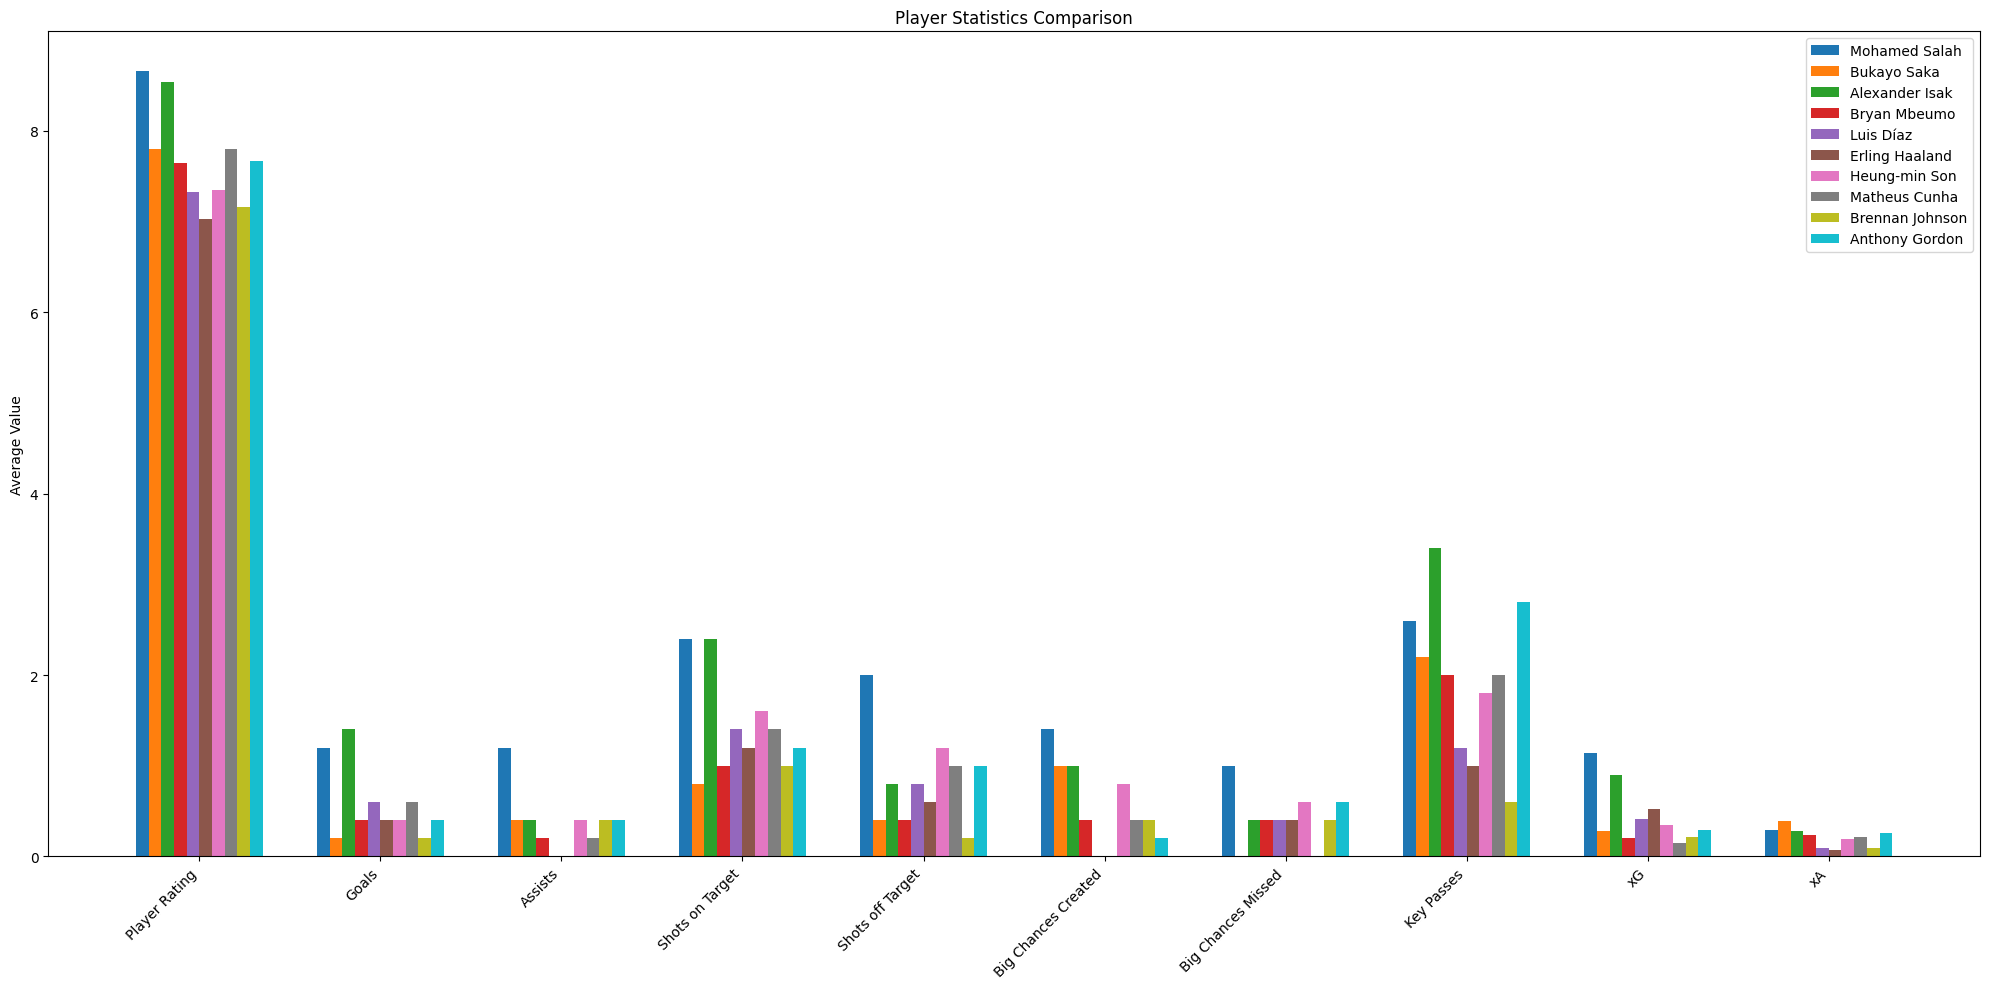

In [25]:
stats_categories = [
    "Player Rating", "Goals", "Assists", "Shots on Target", 
    "Shots off Target", "Big Chances Created", "Big Chances Missed", 
    "Key Passes", "xG", "xA"
]

players = {
    "Mohamed Salah": salah,
    "Bukayo Saka": saka,
    "Alexander Isak": isak,
    "Bryan Mbeumo": mbeumo,
    "Luis Díaz": diaz,
    "Erling Haaland": haaland,
    "Heung-min Son": son,
    "Matheus Cunha": cunha,
    "Brennan Johnson": johnson,
    "Anthony Gordon": gordon
}


player_stats = {name: data[stats_categories].mean().tolist() for name, data in players.items()}

# Plot setup
num_players = len(players)
num_categories = len(stats_categories)
bar_width = 0.7 / num_players
x = np.arange(num_categories) 

fig, ax = plt.subplots(figsize=(20, 10))

for i, (player_name, stats) in enumerate(player_stats.items()):
    ax.bar(
        x + i * bar_width,
        stats,
        bar_width,
        label=player_name
    )

#bonus
ax.set_xticks(x + (num_players - 1) * bar_width / 2)
ax.set_xticklabels(stats_categories, rotation=45, ha='right', fontsize=10)
ax.set_ylabel("Average Value")
ax.set_title("Player Statistics Comparison")
ax.legend()

plt.tight_layout()
plt.show()

## 3. Modelisation

Dans cette partie, nous allons devoir scrapper des données supplémentaires pour tenter de créer des modèles prédictif

In [1]:
!pip install requests pandas numpy http.client tqdm matplotlib seaborn

In [28]:
# python version < 3.12

In [3]:
pip install numpy==2.0.1 scikit-learn==1.6.0 tensorflow==2.18.0


Note: you may need to restart the kernel to use updated packages.


In [4]:
#Import
import os
import requests
import pandas as pd
import numpy as np
import http.client, json
from urllib.parse import urlparse
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### Utils

In [5]:
def get_data(url):
    parsed_url = urlparse(url)
    conn = http.client.HTTPConnection(parsed_url.netloc)
    conn.request("GET", parsed_url.path)
    res = conn.getresponse()
    data = res.read()
    jsondata = json.loads(data.decode("utf-8"))
    return jsondata

def get_matchs_id(tournamentID = '17', seasonID = '52186'):
    matchs_id = []
    url_root = f"https://www.sofascore.com/api/v1/unique-tournament/{tournamentID}/season/{seasonID}/events/last/"
    hasNextPage = True
    i = 0

    while hasNextPage:
        present_url = url_root + str(i)
        data = get_data(present_url)
        for match in data['events']:
            matchs_id.append(match['id'])
        hasNextPage = data['hasNextPage'] #True or False
        i+=1 #access to nextpage
    
    return matchs_id

def get_date(matchID):
    data = get_data(f"https://www.sofascore.com/api/v1/event/{str(matchID)}")
    date = data['event']['startTimestamp']
    return date

In [6]:
# Construct the forward players structured dataset
matchs_id = get_matchs_id()
forward_players = {}

for id in tqdm(matchs_id):
    data = get_data(f"https://www.sofascore.com/api/v1/event/{id}/lineups")
    for team in ['home', 'away']:
        for player in data[team]['players']:
            
            if player['player']['position'] == 'F': #on ne considère que les attaquants

                key = player['player']['name']
                value = player['statistics']
                value['date'] = get_date(id) #dater les matchs
    
                if key in forward_players:
                    forward_players[key].append(value)
                else:
                    forward_players[key] = []
                    forward_players[key].append(value)



100%|██████████| 380/380 [00:32<00:00, 11.82it/s]


## Exploration des données

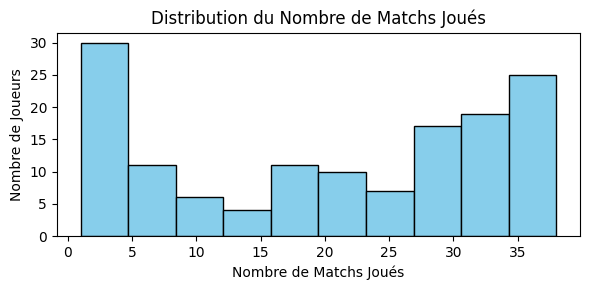

In [7]:
players_name = list(forward_players.keys())
nb_games_played = []
for player in players_name:
    nb_games_played.append(len(forward_players[player]))

df = pd.DataFrame({
    'player': players_name,
    'nb_games_played': nb_games_played
})

df_sorted = df.sort_values(by='nb_games_played', ascending=False)

plt.figure(figsize=(6, 3))
plt.hist(df_sorted['nb_games_played'], color='skyblue', edgecolor='black')
plt.xlabel('Nombre de Matchs Joués')
plt.ylabel('Nombre de Joueurs')
plt.title('Distribution du Nombre de Matchs Joués')
plt.tight_layout()
plt.show()


In [8]:
df_top = df[df['nb_games_played']>30]
players_with_more_30_games = list(df_top['player'])
forward_players = {player : forward_players[player] for player in players_with_more_30_games}
len(forward_players)

44

### Data Cleaning

In [9]:
# Get all features available
features = set()
for player, statistics in forward_players.items():
    for stat in statistics:
        features.update(stat.keys())
features

{'accurateCross',
 'accurateLongBalls',
 'accuratePass',
 'aerialLost',
 'aerialWon',
 'bigChanceCreated',
 'bigChanceMissed',
 'blockedScoringAttempt',
 'challengeLost',
 'clearanceOffLine',
 'date',
 'dispossessed',
 'duelLost',
 'duelWon',
 'errorLeadToAGoal',
 'errorLeadToAShot',
 'expectedAssists',
 'expectedGoals',
 'fouls',
 'goalAssist',
 'goals',
 'hitWoodwork',
 'interceptionWon',
 'keyPass',
 'minutesPlayed',
 'onTargetScoringAttempt',
 'outfielderBlock',
 'ownGoals',
 'penaltyConceded',
 'penaltyMiss',
 'penaltyWon',
 'possessionLostCtrl',
 'rating',
 'ratingVersions',
 'shotOffTarget',
 'totalClearance',
 'totalContest',
 'totalCross',
 'totalLongBalls',
 'totalOffside',
 'totalPass',
 'totalTackle',
 'touches',
 'wasFouled',
 'wonContest'}

In [10]:
selected_features = [
 'accuratePass',
 'bigChanceCreated',
 'bigChanceMissed',
 'date',
 'duelLost',
 'duelWon',
 'expectedAssists',
 'expectedGoals',
 'goalAssist',
 'goals',
 'minutesPlayed',
 'onTargetScoringAttempt',
 'rating',
 'shotOffTarget',
 'totalPass'
 ]

In [11]:
def data_cleaning(matchs : list, selected_features : list):
    df = pd.DataFrame(matchs)
    df = df.reindex(columns=selected_features).fillna(0)
    df = df[df['minutesPlayed']>0]
    df = df.sort_values(by='date', ascending=True)
    return df

### Enregistrement des données

In [12]:
# Créer le dossier 'data' s'il n'existe pas
output_dir = "/home/onyxia/work/Premier-League-Simulation/src/data/model_data"
os.makedirs(output_dir, exist_ok=True)

# Créer un fichier par joueur
for player_name, matches in forward_players.items():
    # Nettoyer les données du joueur
    df = data_cleaning(matches, selected_features)
    
    # Sauvegarder dans un fichier CSV
    output_path = os.path.join(output_dir, f"{player_name}.csv")
    df.to_csv(output_path, index=False)
    print(f"Fichier créé pour {player_name} : {player_name}.csv")

Fichier créé pour Keane Lewis-Potter : Keane Lewis-Potter.csv
Fichier créé pour Yoane Wissa : Yoane Wissa.csv
Fichier créé pour Neal Maupay : Neal Maupay.csv
Fichier créé pour Rodrigo Muniz : Rodrigo Muniz.csv
Fichier créé pour Zeki Amdouni : Zeki Amdouni.csv
Fichier créé pour Jay Rodriguez : Jay Rodriguez.csv
Fichier créé pour Anthony Gordon : Anthony Gordon.csv
Fichier créé pour Alexander Isak : Alexander Isak.csv
Fichier créé pour Miguel Almirón : Miguel Almirón.csv
Fichier créé pour Erling Haaland : Erling Haaland.csv
Fichier créé pour Jérémy Doku : Jérémy Doku.csv
Fichier créé pour Julián Álvarez : Julián Álvarez.csv
Fichier créé pour Matheus Cunha : Matheus Cunha.csv
Fichier créé pour Pablo Sarabia : Pablo Sarabia.csv
Fichier créé pour João Pedro : João Pedro.csv
Fichier créé pour Moussa Diaby : Moussa Diaby.csv
Fichier créé pour Ollie Watkins : Ollie Watkins.csv
Fichier créé pour Nicolas Jackson : Nicolas Jackson.csv
Fichier créé pour Danny Ings : Danny Ings.csv
Fichier créé pou

## Data visualization : un exemple

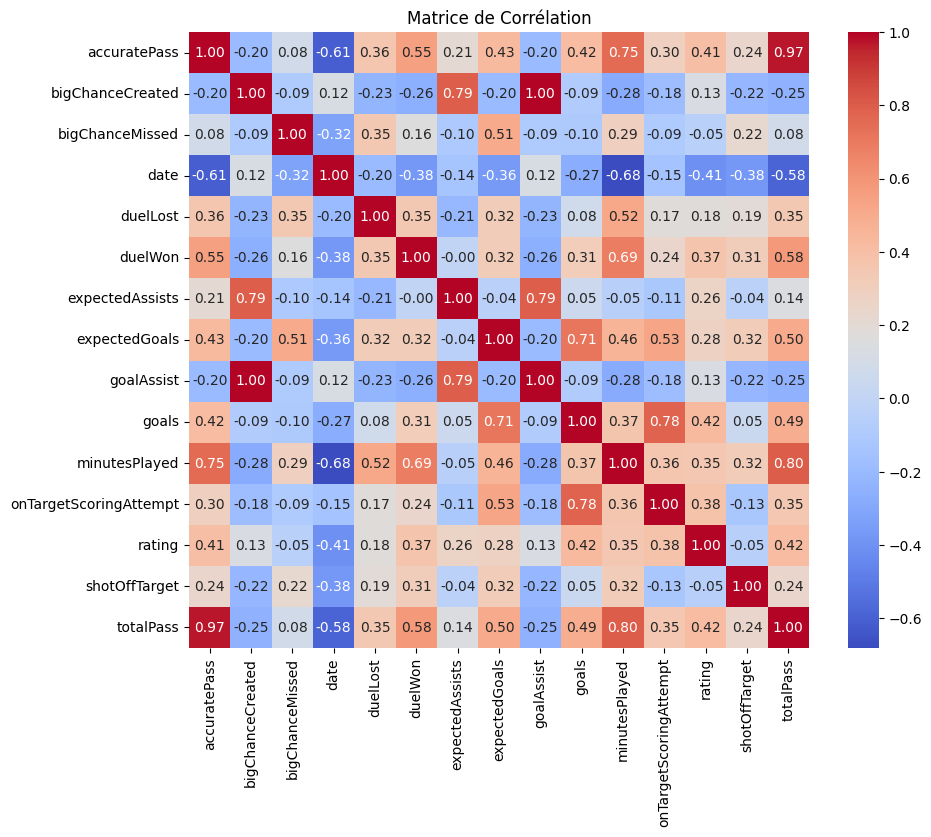

In [13]:
corr_matrix = df.corr()

# Afficher la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

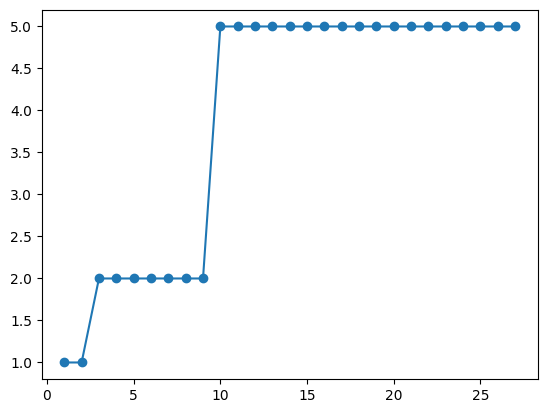

In [14]:
cum_goals = df['goals'].cumsum()

plt.plot(range(1,len(df['date'])+1), cum_goals, marker = 'o')

### Naive modelisation
Let's try to make prediction based only on Mohamed Salah's statistics 

The idea is to predict the goals on next match given the last 5 matchs

In [15]:
def create_sequences(data, target_column, seq_length):
    """
    Generates temporal sequences and corresponding target values for model training.

    Parameters:
    ----------
    data : pandas.DataFrame
        Input data containing features and the target column.
    target_column : str
        Name of the target column to predict.
    seq_length : int
        Number of time steps in each sequence.

    Returns:
    -------
    sequences : numpy.ndarray
        Array of shape `(n_sequences, seq_length, n_features)` containing the feature sequences.
    targets : numpy.ndarray
        Array of shape `(n_sequences,)` containing the target values.

    Notes:
    -----
    - Assumes data is sorted by time.
    - Excludes the 'date' and target columns from sequences.
    """
    sequences = []
    targets = []
    
    for i in range(len(data) - seq_length):
        # Ajouter une séquence de longueur seq_length
        sequences.append(data.iloc[i:i + seq_length].drop(columns=[target_column, 'date']).values)
        # Ajouter la cible correspondante
        targets.append(data.iloc[i + seq_length][target_column])
    
    return np.array(sequences), np.array(targets)

In [16]:
# Load and preprocess data
root = '/home/onyxia/work/Premier-League-Simulation/src/data/model_data/'
df = pd.read_csv(root + "Mohamed Salah.csv")  # Load the dataset
df = df.sort_values(by='date').reset_index(drop=True)  # Ensure data is sorted by time

# Normalize feature columns (excluding target and date)
features_to_normalize = df.drop(columns=["goals", "date"]).columns
scaler = StandardScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Create sequences for time series modeling
seq_length = 5  # Number of time steps in each sequence
X, y = create_sequences(df, target_column="goals", seq_length=seq_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display shapes of training and testing datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (18, 5, 13) (18,)
Testing data shape: (9, 5, 13) (9,)


In [17]:
# Instantiate and train the Linear Regression model
model = LinearRegression()

# Flatten sequences into 2D arrays for compatibility with the model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Fit the model to the training data
model.fit(X_train_flat, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_flat)

# Evaluate the model's performance
print("MSE (Linear Regression):", mean_squared_error(y_test, y_pred))
print("R² (Linear Regression):", r2_score(y_test, y_pred))


MSE (Linear Regression): 0.2906635633954784
R² (Linear Regression): -0.30798603527965285


### Analysis of Results

- The **negative \( R^2 \)** (-0.308) indicates that the model performs worse than a simple mean-based prediction of the target values.

### Possible Causes

1. **Data Size**:
   - Only **27 observations** in total, split into **18 for training** and **9 for testing**. This small dataset makes it challenging for the model to learn meaningful relationships.

2. **Sequence Issues**:
   - Each input sequence contains 5 observations with 13 features, resulting in a flattened input vector of **65 dimensions**. With only 18 training samples, the model is likely to **overfit** or fail to learn effectively.

3. **Model Inappropriateness**:
   - Linear regression may not be suitable for capturing temporal or nonlinear relationships in the data.

### Possible Improvements

- **Increase the dataset size**:
  - Collect more data to improve the model's generalization capability.


# Building a More Robust Model

To enhance the model's performance and generalization, the idea is to incorporate **data from multiple forward players**. By expanding the dataset beyond a single player's data, we aim to capture a wider range of playing styles, patterns, and variability in performance. This approach helps the model learn **generalizable insights** instead of overfitting to the specific traits of one player.

### Why This Matters

- **Diverse Data**: Including multiple forwards introduces variability, making the model better at recognizing universal patterns.
- **Reduced Overfitting**: A broader dataset helps prevent the model from becoming too tailored to one player.
- **Improved Predictions**: By generalizing across players, the model can provide more accurate and robust predictions for unseen data.

Let’s take this model from narrow and specialized to wide and impactful!


In [19]:
# Path to the folder containing data files
path_root = '/home/onyxia/work/Premier-League-Simulation/src/data/model_data'
files_path = [os.path.join(path_root, file_name) for file_name in os.listdir(path_root)]

# Parameters
seq_length = 5  # Length of each input sequence
sequences = []
targets = []

# Iterate over all data files to process and combine data
for file in files_path:
    try:
        # Load data from the current file
        df = pd.read_csv(file)
        
        # Create sequences and corresponding targets
        seq, targ = create_sequences(df, target_column="goals", seq_length=seq_length)
        
        # Check compatibility of sequence and target dimensions
        if seq.shape[0] == targ.shape[0] and seq.ndim == 3 and targ.ndim == 1:
            # Append sequences and targets to the main dataset
            if len(sequences) == 0:
                sequences = seq
                targets = targ
            else:
                sequences = np.concatenate((sequences, seq), axis=0)
                targets = np.concatenate((targets, targ), axis=0)
        else:
            print(f"File ignored: {file} - Incompatible dimensions (seq: {seq.shape}, targ: {targ.shape})")
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Final data check
print("Final shape of sequences:", sequences.shape)
print("Final shape of targets:", targets.shape)


File ignored: /home/onyxia/work/Premier-League-Simulation/src/data/model_data/Divin Mubama.csv - Incompatible dimensions (seq: (0,), targ: (0,))
Final shape of sequences: (1162, 5, 13)
Final shape of targets: (1162,)


1. Linear Regression

In [20]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# 80% of the data is used for training, and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    sequences, targets, test_size=0.2, random_state=42
)

# Display the shapes of the resulting datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (929, 5, 13) (929,)
Testing data shape: (233, 5, 13) (233,)


In [21]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and apply the transformation
# The data is reshaped into 2D for scaling and then reshaped back to its original shape
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

# Display the shapes of the normalized datasets
print("Normalized training data shape:", X_train_scaled.shape)
print("Normalized testing data shape:", X_test_scaled.shape)

Normalized training data shape: (929, 5, 13)
Normalized testing data shape: (233, 5, 13)


In [22]:
# Flatten sequences for Linear Regression (RL) and Random Forest (RF)
# Each sequence is reshaped from 3D (samples, time steps, features) to 2D (samples, flattened features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Display the shapes of the flattened datasets
print("Flattened training data shape for RL and RF:", X_train_flat.shape)
print("Flattened testing data shape for RL and RF:", X_test_flat.shape)


Flattened training data shape for RL and RF: (929, 65)
Flattened testing data shape for RL and RF: (233, 65)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the Linear Regression model
model_rl = LinearRegression()
model_rl.fit(X_train_flat, y_train)

# Make predictions on the test data
y_pred_rl = model_rl.predict(X_test_flat)

# Evaluate the model using MSE and R² metrics
mse_rl = mean_squared_error(y_test, y_pred_rl)
r2_rl = r2_score(y_test, y_pred_rl)

# Print evaluation results
print("MSE (RL):", mse_rl)
print("R² (RL):", r2_rl)


MSE (RL): 0.33315996136059145
R² (RL): -0.019326033718730207


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest model
# Random Forest uses multiple decision trees to improve predictions
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_flat, y_train)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test_flat)

# Evaluate the model using MSE and R² metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation results
print("MSE (RF):", mse_rf)
print("R² (RF):", r2_rf)


MSE (RF): 0.33241974248927036
R² (RF): -0.017061282687105495


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Build the LSTM model
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)  # Output layer for a single prediction
])

# Compile the model
# Using Mean Squared Error (MSE) as loss and Mean Absolute Error (MAE) as a metric
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model_lstm.fit(
    X_train, y_train, 
    epochs=50, batch_size=16, 
    validation_split=0.2, verbose=1
)

# Make predictions on the test data
y_pred_lstm = model_lstm.predict(X_test).flatten()

# Evaluate the model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

2024-12-29 23:06:58.925234: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-29 23:06:58.930065: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-29 23:06:58.942206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735513618.962456   32689 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735513618.968331   32689 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-29 23:06:58.990620: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/50


2024-12-29 23:07:00.596139: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/onyxia/work/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 7.6481 - mae: 1.8075 - val_loss: 1.1359 - val_mae: 0.8091
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9850 - mae: 0.7328 - val_loss: 0.7296 - val_mae: 0.6484
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6479 - mae: 0.6008 - val_loss: 0.6174 - val_mae: 0.5608
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4574 - mae: 0.4988 - val_loss: 0.7544 - val_mae: 0.6057
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3969 - mae: 0.4896 - val_loss: 0.4696 - val_mae: 0.5496
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4153 - mae: 0.4847 - val_loss: 0.5756 - val_mae: 0.6531
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4684 - mae: 0.5194 - val_loss: 0.3976 - val_mae: 0.4762
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3673 - mae: 0.4588 - val_loss: 0.4027 - val_mae: 0.4875
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3634 - mae: 0.4741 - v

In [26]:
# Print evaluation results
print("MSE (LSTM):", mse_lstm)
print("R² (LSTM):", r2_lstm)

MSE (LSTM): 0.4620638454621624
R² (LSTM): -0.4137164171717387


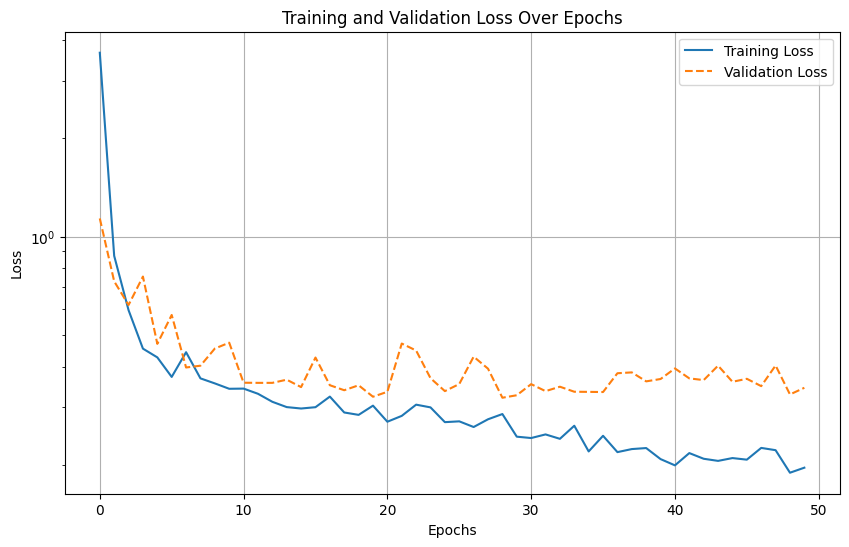

In [27]:
# Extraire les données de perte (loss) et de validation (val_loss)
loss = history.history['loss']
val_loss = history.history['val_loss']

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()


### Model Performance Summary

The results indicate limited performance across models for sequential data prediction. Below is a brief evaluation and improvement suggestions for each model:

| Modèle                   | MSE      | R²       |
|--------------------------|----------|----------|
| Régression Linéaire (RL) | 0.4925   | -0.2534  |
| Random Forest (RF)       | 0.4062   | -0.0376  |
| LSTM                    | 0.6022   | -0.5383  |

---

#### **Linear Regression (LR)**
- **Results**: MSE = 0.4925, R² = -0.2534.
- **Analysis**: 
  - Linear regression struggles to capture complex or temporal dependencies in the data.
  - A negative R² shows the model performs worse than predicting the mean.
- **Challenges**: Inability to model nonlinear or sequential relationships.
- **Improvements**: 
  - Apply nonlinear feature transformations.
  - Introduce more relevant explanatory variables.

---

#### **Random Forest (RF)**
- **Results**: MSE = 0.4062, R² = -0.0376
- **Analysis**: 
  - RF slightly outperforms LR, but its near-zero R² indicates it poorly explains data variance.
  - RF does not inherently handle sequential dependencies well.
- **Challenges**: Limited ability to exploit temporal structures and sensitivity to hyperparameters.
- **Improvements**: 
  - Tune hyperparameters (e.g., tree depth, number of estimators).
  - Explore gradient boosting models (XGBoost, LightGBM).

---

#### **LSTM**
- **Results**: MSE = 0.6022, R² = -0.5383
- **Analysis**: 
  - Despite being designed for sequential data, the LSTM underperforms, likely due to insufficient data or suboptimal hyperparameters.
  - Neural networks require larger datasets to generalize effectively.
- **Challenges**: Risk of overfitting on small datasets, slow convergence with non-optimized settings.
- **Improvements**: 
  - Expand dataset size or perform data augmentation.
  - Optimize architecture (e.g., dropout, batch normalization, hyperparameter tuning).

---

### General Recommendations
1. **Data Quality**: Improve data preprocessing and include more relevant features (rank of two teams).
2. **Dataset Size**: Collect more data or augment existing data to enhance model performance.
